In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv('covid_second_dose.csv')
dataset.head(10)

,Day,Number of Vaccinations (Second Dose)
0,2021-04-08,81323.0
1,2021-04-10,136703.0
2,2021-04-11,165691.0
3,2021-04-12,138879.0
4,2021-04-13,210579.0
5,2021-04-15,196976.0
6,2021-04-17,221616.0
7,2021-04-18,214842.0
8,2021-04-19,140678.0
9,2021-04-20,170902.0


In [3]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
dataset['Day']= label_encoder.fit_transform(dataset['Day']) 
print(dataset.head(100))

    Day  Number of Vaccinations (Second Dose)
0     0                               81323.0
1     1                              136703.0
2     2                              165691.0
3     3                              138879.0
4     4                              210579.0
..  ...                                   ...
95   95                               98476.0
96   96                              137220.0
97   97                              169132.0
98   98                              163772.0
99   99                              158366.0

[100 rows x 2 columns]


In [4]:
dataset.shape

(209, 2)

In [5]:
dataset.describe()

,Day,Number of Vaccinations (Second Dose)
count,209.000000,2.090000e+02
mean,104.000000,2.189459e+05
std,60.477268,4.640586e+05
min,0.000000,2.120000e+02
25%,52.000000,1.228100e+04
50%,104.000000,1.512520e+05
75%,156.000000,2.504890e+05
max,208.000000,5.444166e+06


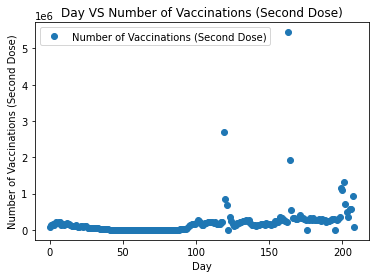

In [6]:
dataset.plot(x='Day', y='Number of Vaccinations (Second Dose)', style='o')  
plt.title('Day VS Number of Vaccinations (Second Dose)')  
plt.xlabel('Day')  
plt.ylabel('Number of Vaccinations (Second Dose)')  
plt.show()

In [7]:
X= dataset.drop('Number of Vaccinations (Second Dose)', axis=1)
y= dataset['Number of Vaccinations (Second Dose)']

print('Shape of X =', X.shape)
print('Shape of y =', y.shape)

Shape of X = (209, 1)
Shape of y = (209,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=51)
 
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (167, 1)
Shape of y_train =  (167,)
Shape of X_test =  (42, 1)
Shape of y_test =  (42,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
 
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr.coef_

array([157464.68159729])

In [12]:
lr.intercept_

233595.6766467066

In [13]:
X_test[0, :]

array([-1.55312948])

In [14]:
lr.predict([X_test[0, :]])

array([-10967.36239576])

In [15]:
lr.predict(X_test)

array([-10967.36239576, 130038.29492059, 216208.41883613, 294544.89512299,
       247543.00935087, -29245.87352936, -21412.22590067, 401604.74604836,
       435550.55243933, 492997.30171636, -47524.38466296, 119593.43141567,
        69980.32976733, 156150.45368287, 260599.08873202, 158761.6695591 ,
       182262.61244516,  62146.68213864, -37079.52115804,   7311.14873784,
        12533.5804903 , 487774.86996391, 103926.1361583 , 106537.35203453,
       140483.1584255 , 419883.25718196,  46479.38688127, 297156.11099922,
       224042.06646482,  43868.17100504, 299767.32687545, 210985.98708367,
        22978.44399521, 359825.2920287 , 323268.2697615 ,  85647.6250247 ,
       273655.16811316, 302378.54275167, 234486.92996973,  33423.30750013,
       351991.64440002, 344157.99677133])

In [16]:
y_test

14     131357.0
68        743.0
101    265935.0
131    205528.0
113    205300.0
7      214842.0
10     137798.0
172    339877.0
185    250489.0
207    927256.0
0       81323.0
64       1615.0
45       6482.0
78        665.0
118    230818.0
79        708.0
88       9902.0
42       9180.0
4      210579.0
21     103800.0
23      88107.0
205    570312.0
58       3185.0
59       2901.0
72        723.0
179    262303.0
36      37287.0
132    236723.0
104    124862.0
35      33655.0
133    255841.0
99     158366.0
27      48930.0
156    231514.0
142    138064.0
51       3359.0
123    347979.0
134    262718.0
108    220102.0
31      53915.0
153    172727.0
150    161439.0
Name: Number of Vaccinations (Second Dose), dtype: float64

In [17]:
lr.score(X_test, y_test)

0.37673823805754036